In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate a small dataset with normal and anomalous data
time = pd.date_range(start='2023-01-01', periods=100, freq='h')

# Simulate normal temperatures (mean=75°C, standard deviation=10°C)
temperature1 = np.random.normal(loc=75, scale=10, size=100)
temperature2 = np.random.normal(loc=75, scale=10, size=100)
temperature3 = np.random.normal(loc=75, scale=10, size=100)
temperature4 = np.random.normal(loc=75, scale=10, size=100)

# Simulate pressure (mean=30 atm, standard deviation=5 atm)
pressure = np.random.normal(loc=30, scale=5, size=100)

# Introduce downward anomalies in one of the temperatures
temperature1[15:20] = np.random.normal(loc=20, scale=5, size=5)  
temperature2[15:20] = np.random.normal(loc=20, scale=5, size=5)  
temperature3[15:20] = np.random.normal(loc=20, scale=5, size=5)  
temperature4[15:20] = np.random.normal(loc=20, scale=5, size=5) 

temperature1[30:35] = np.random.normal(loc=18, scale=5, size=5)  
temperature2[30:35] = np.random.normal(loc=18, scale=5, size=5)  
temperature3[30:35] = np.random.normal(loc=18, scale=5, size=5)  
temperature4[30:35] = np.random.normal(loc=18, scale=5, size=5) 

temperature1[50:55] = np.random.normal(loc=25, scale=5, size=5)  
temperature2[50:55] = np.random.normal(loc=25, scale=5, size=5)  
temperature3[50:55] = np.random.normal(loc=25, scale=5, size=5)  
temperature4[50:55] = np.random.normal(loc=25, scale=5, size=5) 

temperature1[80:83] = np.random.normal(loc=20, scale=5, size=3)  
temperature2[80:83] = np.random.normal(loc=20, scale=5, size=3)  
temperature3[80:83] = np.random.normal(loc=20, scale=5, size=3)   
temperature4[80:83] = np.random.normal(loc=20, scale=5, size=3) 

temperature1[85:88] = np.random.normal(loc=21, scale=5, size=3)  
temperature2[85:88] = np.random.normal(loc=21, scale=5, size=3)  
temperature3[85:88] = np.random.normal(loc=21, scale=5, size=3)   
temperature4[85:88] = np.random.normal(loc=21, scale=5, size=3)

temperature1[92:95] = np.random.normal(loc=25, scale=5, size=3)
temperature2[92:95] = np.random.normal(loc=25, scale=5, size=3)  
temperature3[92:95] = np.random.normal(loc=25, scale=5, size=3)   
temperature4[92:95] = np.random.normal(loc=25, scale=5, size=3)  

# Simulate missing values (0) for temperature data
temperature1[10:12] = 0
temperature2[40:42] = 0
temperature3[60:62] = 0
temperature4[80:82] = 0

# Create a DataFrame
df = pd.DataFrame({
    'time': time,
    'temperature1': temperature1,
    'temperature2': temperature2,
    'temperature3': temperature3,
    'temperature4': temperature4,
    'pressure': pressure
})




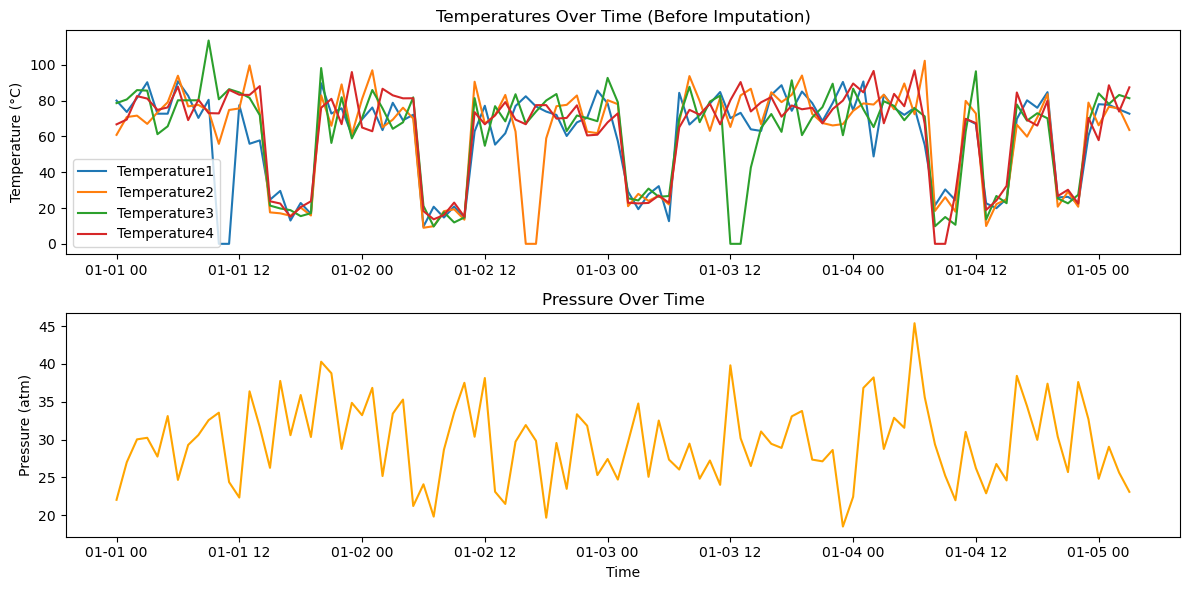

In [4]:
# Visualize the data before imputation
plt.figure(figsize=(12, 6))

# Plot temperature1, temperature2, temperature3, temperature4
plt.subplot(2, 1, 1)
plt.plot(df['time'], df['temperature1'], label='Temperature1')
plt.plot(df['time'], df['temperature2'], label='Temperature2')
plt.plot(df['time'], df['temperature3'], label='Temperature3')
plt.plot(df['time'], df['temperature4'], label='Temperature4')
plt.title('Temperatures Over Time (Before Imputation)')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot pressure
plt.subplot(2, 1, 2)
plt.plot(df['time'], df['pressure'], label='Pressure', color='orange')
plt.title('Pressure Over Time')
plt.ylabel('Pressure (atm)')
plt.xlabel('Time')

plt.tight_layout()
plt.show()

## Pre-process data

In [5]:

# Impute missing values (0) with the column mean
df_imputed = df.copy()
df_imputed[['temperature1', 'temperature2', 'temperature3', 'temperature4']] = df_imputed[['temperature1', 'temperature2', 'temperature3', 'temperature4']].replace(0, np.nan)
df_imputed.fillna(df_imputed[['temperature1', 'temperature2', 'temperature3', 'temperature4']].mean(), inplace=True)

## Labeled data

In [6]:
# Simulate true anomalies
# Let's assume anomalies occurred at the same time slots where we manually injected them in the dataset
# We mark anomalies as 1 (True Anomaly) and normal data as 0 (Normal)
true_anomalies = np.zeros(len(df_imputed))

true_anomalies[15:20] = 1
true_anomalies[30:35] = 1 
true_anomalies[50:55] = 1


In [7]:
true_anomalies

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
# Create a new DataFrame with true_anomalies
df_concat = pd.concat([df_imputed, 
                      pd.Series(true_anomalies, name='anomaly')], 
                     axis=1)
df_concat

,time,temperature1,temperature2,temperature3,temperature4,pressure,anomaly
0,2023-01-01 00:00:00,79.967142,60.846293,78.577874,66.710050,22.027862,0.0
1,2023-01-01 01:00:00,73.617357,70.793547,80.607845,69.398190,27.003125,0.0
2,2023-01-01 02:00:00,81.476885,71.572855,85.830512,82.472936,30.026218,0.0
3,2023-01-01 03:00:00,90.230299,66.977227,85.538021,81.103703,30.234903,0.0
4,2023-01-01 04:00:00,72.658466,73.387143,61.223306,74.790984,27.749673,0.0
...,...,...,...,...,...,...,...
95,2023-01-04 23:00:00,60.364851,78.853174,68.070904,70.308243,32.694550,0.0
96,2023-01-05 00:00:00,77.961203,66.161426,83.995999,57.868655,24.813769,0.0
97,2023-01-05 01:00:00,77.610553,76.537251,78.072995,88.538724,29.048307,0.0
98,2023-01-05 02:00:00,75.051135,75.582087,83.128621,73.854602,25.621909,0.0


In [9]:
anomaly_data = df_concat[df_concat['anomaly'] == 1]
anomaly_data

,time,temperature1,temperature2,temperature3,temperature4,pressure,anomaly
15,2023-01-01 15:00:00,24.630888,17.564373,21.352284,23.776956,26.257567,1.0
16,2023-01-01 16:00:00,29.547083,17.038030,19.748809,22.504586,37.755760,1.0
17,2023-01-01 17:00:00,13.007162,15.680046,18.805260,15.112224,30.578373,1.0
18,2023-01-01 18:00:00,22.814846,20.242608,15.462182,20.496662,35.896486,1.0
19,2023-01-01 19:00:00,16.746787,15.845249,17.116143,23.756936,30.337592,1.0
30,2023-01-02 06:00:00,9.652974,8.975589,21.192962,18.236993,24.083707,1.0
31,2023-01-02 07:00:00,20.716801,9.862288,9.692400,13.697933,19.803839,1.0
32,2023-01-02 08:00:00,14.686881,18.240425,17.669601,16.077222,28.652966,1.0
33,2023-01-02 09:00:00,20.852993,19.298613,11.944919,23.031464,33.587711,1.0
34,2023-01-02 10:00:00,14.183704,13.478417,14.740819,15.115541,37.511785,1.0


In [10]:
# Features: temperature sensors and pressure
features = df_imputed[['temperature1', 'temperature2', 'temperature3', 'temperature4', 'pressure']]

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## Distributions

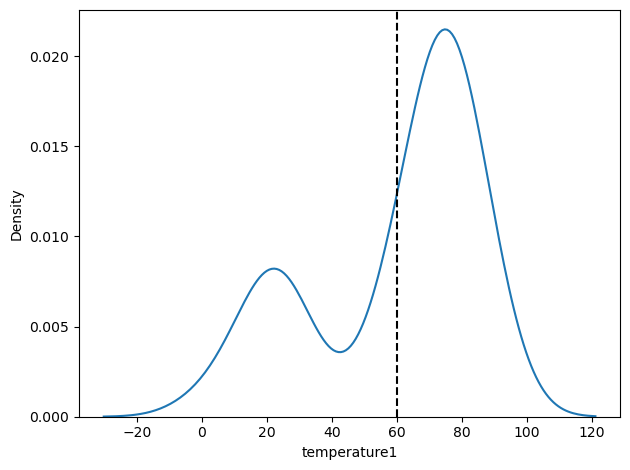

In [11]:
import seaborn as sns  # Imports seaborn, a statistical data visualization library

# Creates a Kernel Density Estimation (KDE) plot of temperature distribution
sns.kdeplot(df['temperature1'])  # Shows the probability density of temperature values

plt.grid(False)  # Removes the grid lines from the plot

# Adds a vertical line at x=0.134 spanning from y=0 to y=1
plt.axvline(df['temperature1'].mean(), 0, 1, c='black', ls='--')  # Black dashed line

plt.tight_layout()  # Adjusts the plot layout to fit in the figure area
plt.show()  # Displays the plot

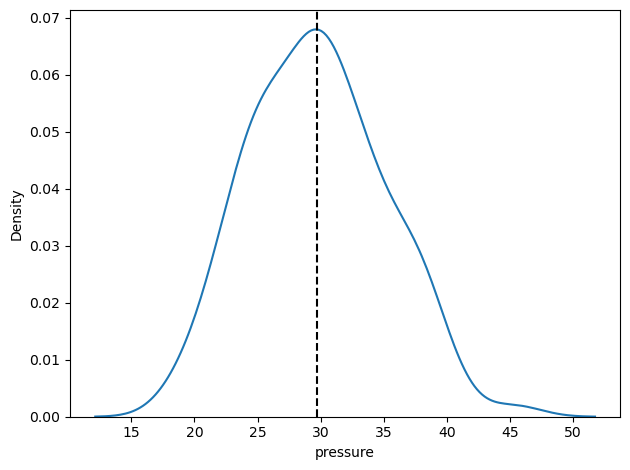

In [12]:
# Creates a Kernel Density Estimation (KDE) plot of pressure distribution
sns.kdeplot(df['pressure'])  # Shows the probability density of pressure values

plt.grid(False)  # Removes the grid lines from the plot

# Adds a vertical line at the mean pressure
plt.axvline(df['pressure'].mean(), 0, 1, c='black', ls='--')  # Black dashed line

plt.tight_layout()  # Adjusts the plot layout to fit in the figure area
plt.show()  # Displays the plot

In [13]:
# Calculate the mean temperature#

## Training a Logistic Regression Classifier

In [14]:
# Labels: true anomalies
labels = true_anomalies

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)


In [15]:
print("Training set shape:", y_train.shape)
print("Test set shape:", y_test.shape)
print("\nTotal samples:", len(y_train) + len(y_test))
print("Training set percentage:", round(len(y_train)/(len(y_train) + len(y_test))*100, 2), "%")
print("Test set percentage:", round(len(y_test)/(len(y_train) + len(y_test))*100, 2), "%")

Training set shape: (80,)
Test set shape: (20,)

Total samples: 100
Training set percentage: 80.0 %
Test set percentage: 20.0 %


In [16]:
# Create and train the Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        15
         1.0       1.00      0.80      0.89         5

    accuracy                           0.95        20
   macro avg       0.97      0.90      0.93        20
weighted avg       0.95      0.95      0.95        20


Confusion Matrix:
 [[15  0]
 [ 1  4]]


The classification report will include:

Precision: The proportion of positive predictions that are actually correct (how many predicted anomalies are truly anomalies).

Recall: The proportion of actual anomalies that are correctly identified (how many true anomalies were detected).

F1-Score: The harmonic mean of precision and recall.

Support: The number of occurrences of each class (normal vs. anomaly).

The confusion matrix will show:

True Positives (TP): Correctly classified anomalies.

False Positives (FP): Normal data incorrectly classified as anomalies.

True Negatives (TN): Correctly classified normal data.

False Negatives (FN): Anomalies incorrectly classified as normal.

In [17]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1.])

## Visualization
### True values

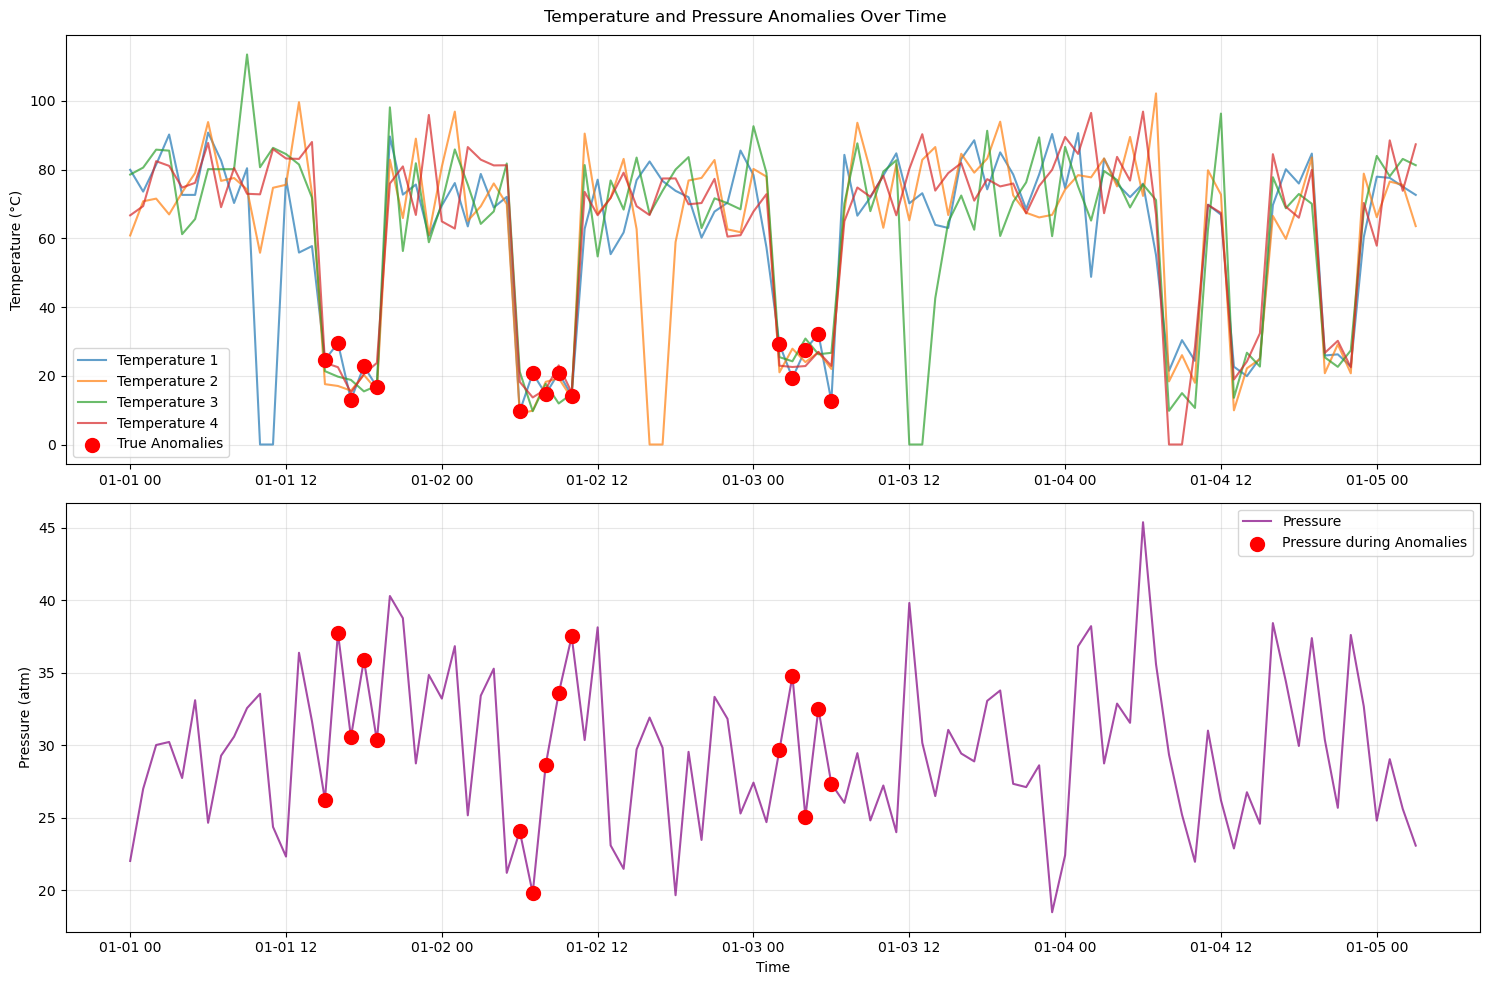

In [18]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# Plot temperatures and anomalies
plt.subplot(2, 1, 1)
plt.plot(df['time'], df['temperature1'], label='Temperature 1', alpha=0.7)
plt.plot(df['time'], df['temperature2'], label='Temperature 2', alpha=0.7)
plt.plot(df['time'], df['temperature3'], label='Temperature 3', alpha=0.7)
plt.plot(df['time'], df['temperature4'], label='Temperature 4', alpha=0.7)

# Highlight true anomalies
anomaly_times = df['time'][true_anomalies == 1]
plt.scatter(anomaly_times, df.loc[true_anomalies == 1, 'temperature1'], 
           color='red', marker='o', s=100, label='True Anomalies', zorder=5)

# Plot pressure
plt.subplot(2, 1, 2)
plt.plot(df['time'], df['pressure'], label='Pressure', color='purple', alpha=0.7)
# Mark pressure values during anomalies
plt.scatter(anomaly_times, df.loc[true_anomalies == 1, 'pressure'],
           color='red', marker='o', s=100, label='Pressure during Anomalies', zorder=5)

# Customize the plots
plt.suptitle('Temperature and Pressure Anomalies Over Time', fontsize=12)
plt.subplot(2, 1, 1)
plt.ylabel('Temperature (°C)')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.xlabel('Time')
plt.ylabel('Pressure (atm)')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ValueError: Item wrong length 20 instead of 100.

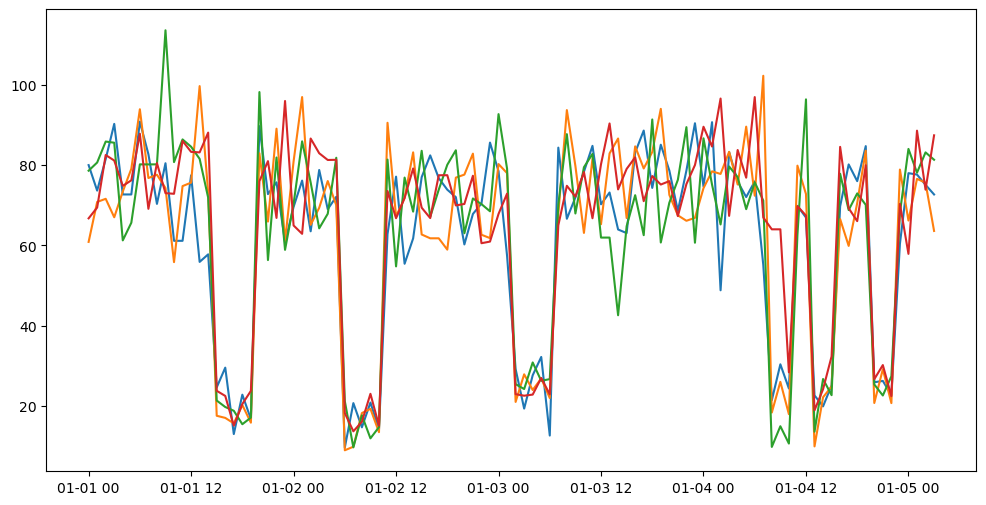

In [24]:
# Create the plot
plt.figure(figsize=(12, 6))

# Plot the four temperatures
plt.plot(df_imputed['time'], df_imputed['temperature1'], label='Temperature1')
plt.plot(df_imputed['time'], df_imputed['temperature2'], label='Temperature2')
plt.plot(df_imputed['time'], df_imputed['temperature3'], label='Temperature3')
plt.plot(df_imputed['time'], df_imputed['temperature4'], label='Temperature4')

# Get the predicted anomalies by creating a mask for the test set
test_indices = np.arange(len(df_imputed))[len(df_imputed)-len(y_pred):] # Get indices for test set
predicted_anomaly_indices = df_imputed[y_pred == 1] # Get indices where predictions are 1
predicted_anomalies = pd.Series(1, index=predicted_anomaly_indices)

# Highlight true anomalies with red dots
for i, is_anomaly in enumerate(true_anomalies):
    if is_anomaly:
        plt.scatter(df_imputed['time'].iloc[i], 
                   df_imputed['temperature1'].iloc[i],
                   color='blue', marker='o', s=100, label='True Anomaly' if i == 30 else "")

# Highlight predicted anomalies with red crosses
for idx in predicted_anomaly_indices:
    plt.scatter(df_imputed['time'].iloc[idx], 
               df_imputed['temperature1'].iloc[idx],
               color='red', marker='o', s=100, label='True anomalies' if idx == predicted_anomaly_indices[0] else "")
    


# Add labels and title
plt.title('Temperature Over Time with True and Predicted Anomalies')
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.legend()

plt.tight_layout()
plt.show()

# Improve precision
* **Logistic Regression** and other classifiers typically use a threshold of 0.5 to decide whether a prediction should be classified as `1` (anomaly) or `0` (normal). By default, it predicts the label `1` when the predicted probability is greater than or equal to 0.5.

* To **improve precision**, you can **increase the threshold**. This will make the model more conservative in predicting anomalies, potentially reducing false positives (FP) at the cost of increasing false negatives (FN).

For example, if you set a higher threshold, say `0.7`, the model will only classify a data point as an anomaly when its predicted probability of being an anomaly is above `70%`. This can help ensure that only very strong outliers are flagged as anomalies, which will likely improve precision.

Here’s how to adjust the decision threshold in **Logistic Regression**:

In [20]:
# Make probability predictions instead of class predictions
y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for class '1' (anomaly)

# Set a higher threshold (e.g., 0.7 instead of 0.5)
threshold = 0.7
y_pred_high_threshold = (y_prob >= threshold).astype(int)

# Evaluate precision with the new threshold
from sklearn.metrics import precision_score
print("Precision with threshold 0.7:", precision_score(y_test, y_pred_high_threshold))

Precision with threshold 0.7: 1.0


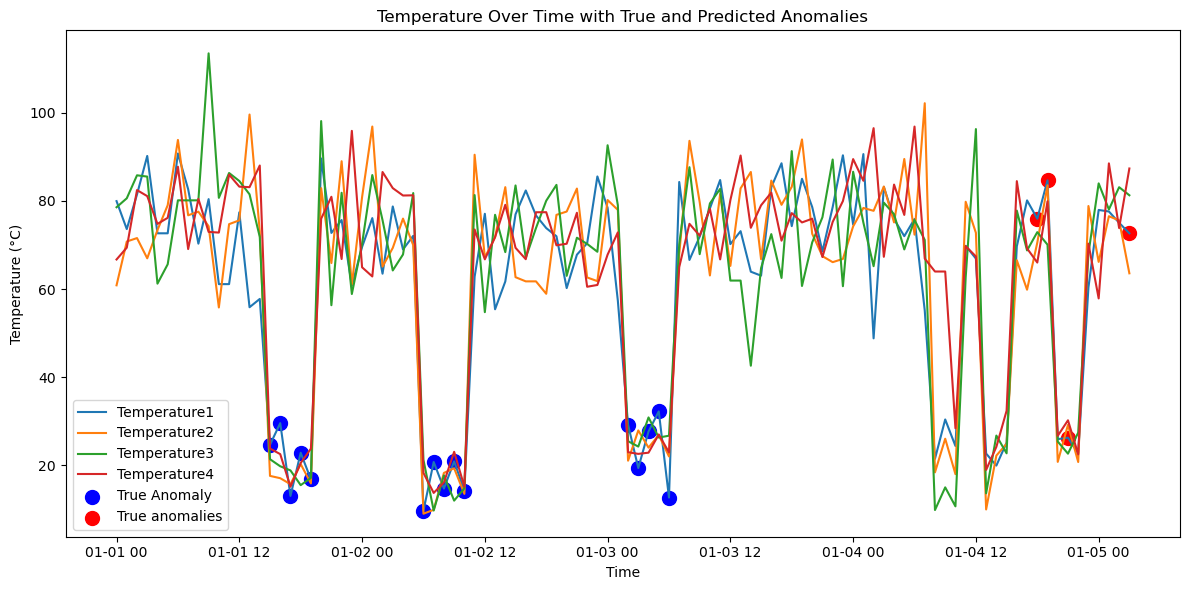

In [21]:
# Create the plot
plt.figure(figsize=(12, 6))

# Plot the four temperatures
plt.plot(df_imputed['time'], df_imputed['temperature1'], label='Temperature1')
plt.plot(df_imputed['time'], df_imputed['temperature2'], label='Temperature2')
plt.plot(df_imputed['time'], df_imputed['temperature3'], label='Temperature3')
plt.plot(df_imputed['time'], df_imputed['temperature4'], label='Temperature4')

# Get the predicted anomalies by creating a mask for the test set
test_indices = np.arange(len(df_imputed))[len(df_imputed)-len(y_pred):] # Get indices for test set
predicted_anomaly_indices = test_indices[y_pred == 1] # Get indices where predictions are 1
predicted_anomalies = pd.Series(1, index=predicted_anomaly_indices)

# Highlight true anomalies with red dots
for i, is_anomaly in enumerate(true_anomalies):
    if is_anomaly:
        plt.scatter(df_imputed['time'].iloc[i], 
                   df_imputed['temperature1'].iloc[i],
                   color='blue', marker='o', s=100, label='True Anomaly' if i == 30 else "")

# Highlight predicted anomalies with red crosses
for idx in predicted_anomaly_indices:
    plt.scatter(df_imputed['time'].iloc[idx], 
               df_imputed['temperature1'].iloc[idx],
               color='red', marker='o', s=100, label='True anomalies' if idx == predicted_anomaly_indices[0] else "")
    


# Add labels and title
plt.title('Temperature Over Time with True and Predicted Anomalies')
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.legend()

plt.tight_layout()
plt.show()